# Example 2: R$_{1\rho}$ Relaxation under MAS

In [1]:
# git clone https://github.com/alsinmr/pyRelaxSim.git
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync')
sys.path.append('/Users/albertsmith/Documents/GitHub')
import pyRelaxSim as RS
import numpy as np

In [2]:
%matplotlib notebook

## Build the spin system
For relaxation induced by exchange, we always build the spin system with at least two different sets of interactions. Not all interactions must change, but at least one interaction should be different– otherwise no relaxation will occure. Note that best-practice is to build the first spin-system, and copy it and only edit the parameters that are changed in the second spin-system.

pyRelaxSim takes the main experimental parameters (excepting rf fields) upon initialization of a spin-system, and then interactions are added afterwards.

In [3]:
ex0=RS.ExpSys(v0H=600,vr=60000,Nucs=['15N','1H'],pwdavg=RS.PowderAvg(q=3))     #1-spin system at 600 MHz (14.1 T)
delta=RS.Tools.dipole_coupling(.104,'1H','15N')       #Built-in dipole coupling calculator
ex0.set_inter(Type='dipole',i0=0,i1=1,delta=22954)    #Dipole coupling
ex1=ex0.copy()   #Copies the spin-system
ex1.set_inter(Type='dipole',i0=0,i1=1,delta=22954,euler=[0,20*np.pi/180,0])   #30 degree hop of dipole coupling

## Define Liouvillian, pulse sequence, initial density operator, detection operator

In [4]:
L=RS.Liouvillian((ex0,ex1))  #Liouvillian with both Hamiltonians
seq=RS.Sequence(L)
seq.add_channel('15N',v1=30000) #Constant field (25 kHz) applied
rho=RS.Rho(rho0='15Nx',detect='15Nx',L=L)   #Specify by Nucleus type and operator type

## Calculate time-trace as a function of correlation time

<IPython.core.display.Javascript object>


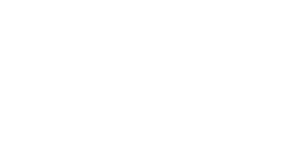

In [5]:
fig=plt.figure()
plt.close()
ax=fig.add_subplot(111)  #Axis for plotting results
fig.set_size_inches([0,0])

In [6]:
from time import time
RS.Defaults['parallel']=True
t0=time()
tc0=np.logspace(-8,-3,6)   #Correlation time axis
for tc in tc0:
    L.kex=[[-1/(2*tc),1/(2*tc)],[1/(2*tc),-1/(2*tc)]]
    U=seq.U()**50  #Propagator for 50 rotor periods (L.U() returns 1 rotor period, **50 raises it to 50 rotor periods)
    
    rho.clear()  #Clear all information out of rho
    rho.DetProp(U,n=400)  #Detect and then apply propagator 100 times (so 5000 rotor cycles)
    _=rho.plot(ax=ax)
_=ax.legend([r'$\tau_c$='+f'{tc:.0e} s' for tc in tc0],loc='upper right')
print(time()-t0)

16.1824209690094


In [7]:
RS.Defaults['parallel']=False
t0=time()
tc0=np.logspace(-8,-3,6)   #Correlation time axis
for tc in tc0:
    L.kex=[[-1/(2*tc),1/(2*tc)],[1/(2*tc),-1/(2*tc)]]
    U=seq.U()**50  #Propagator for 50 rotor periods (L.U() returns 1 rotor period, **50 raises it to 50 rotor periods)
    
    rho.clear()  #Clear all information out of rho
    rho.DetProp(U,n=400)  #Detect and then apply propagator 100 times (so 5000 rotor cycles)
    _=rho.plot(ax=ax)
_=ax.legend([r'$\tau_c$='+f'{tc:.0e} s' for tc in tc0],loc='upper right')
print(time()-t0)

26.96471619606018


<IPython.core.display.Javascript object>


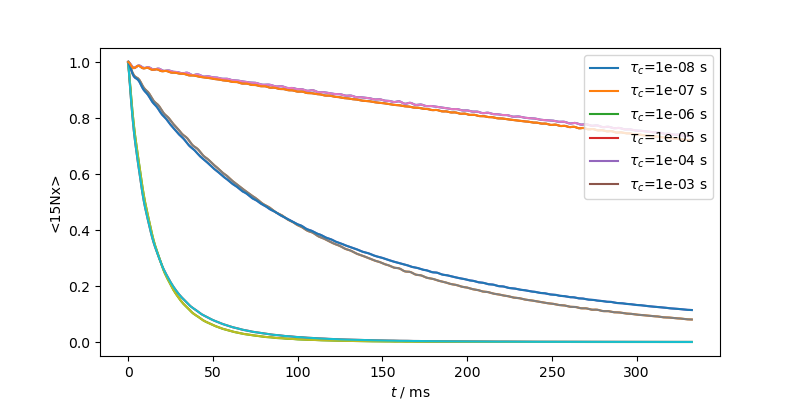

In [8]:
fig.set_size_inches([8,4])
fig

## Sweep through field strengths and correlation times

In [25]:
tc0=np.logspace(-8,-3,6)
v10=np.linspace(5000,45000,9)
R1p=list()
rho=RS.Rho(rho0='15Nx',detect='15Nx',L=L)   #Specify by Nucleus type and operator type
for tc in tc0:
    R1p.append(list())
    for v1 in v10:
        L.kex=[[-1/(2*tc),1/(2*tc)],[1/(2*tc),-1/(2*tc)]]
        L.fields['15N']=(v1,0,0)
        U=L.U()
        rho.clear()
        R1p[-1].append((U**20*rho).extract_decay_rates(U,pwdavg=True))

## Plot the results

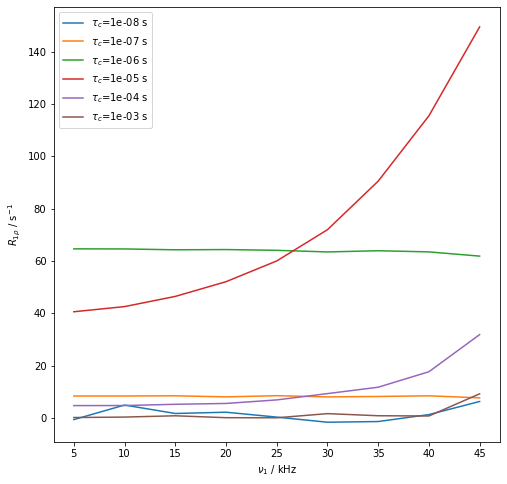

In [28]:
R1p=np.array(R1p)
ax=plt.figure().add_subplot(111)
for R1p0 in R1p:
    ax.plot(v10/1e3,R1p0)
ax.set_xlabel(r'$\nu_1$ / kHz')
ax.set_ylabel(r'$R_{1\rho}$ / s$^{-1}$')
ax.legend([r'$\tau_c$='+f'{tc:.0e} s' for tc in tc0],loc='upper left')
ax.figure.set_size_inches([8,8])
    

<IPython.core.display.Javascript object>


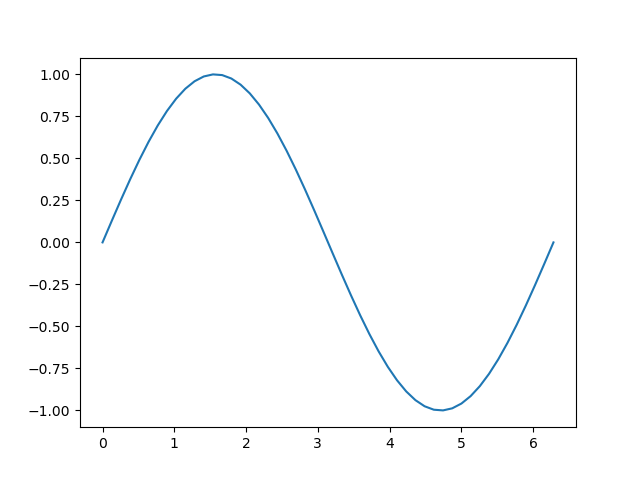

In [2]:
%matplotlib notebook
x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

#def update(w = 1.0):
#    line.set_ydata(np.sin(w * x))
#    fig.canvas.draw_idle()
#interact(update);